In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv("crypto_data.csv")
data

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Droppng rows where IsTrading is False

crypto_df = data[data.IsTrading == True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
# dropping  IsTrading column 

df = crypto_df.drop("IsTrading",1)
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# Remove all rows that have at least one null value.
df= df[df["TotalCoinsMined"].notnull()]
df.head(20)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [6]:
# total coins mined should be greater than zero

df = df.loc[df["TotalCoinsMined"]>0]
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
df.columns

Index(['Unnamed: 0', 'CoinName', 'Algorithm', 'ProofType', 'TotalCoinsMined',
       'TotalCoinSupply'],
      dtype='object')

In [8]:
#  delete the `CoinName` from the original dataframe
df=df.drop(labels = ["CoinName","Unnamed: 0"], axis =1)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Convert Algorithm` and `ProofType`, into numerical data
df_dummies= pd.get_dummies(df)
df_dummies

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome

scaler=StandardScaler()
scaler.fit(df_dummies)

df_dummies_scaled=scaler.transform(df_dummies)
df_dummies_scaled

array([[-0.11710817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [11]:
pca= PCA(n_components=0.90)

data_pca= pca.fit_transform(df_dummies_scaled)
data_pca

array([[-2.67092248e-01, -1.16293969e-01, -6.07360278e-16, ...,
         3.33245356e+00, -5.05306342e-01, -6.84064391e-01],
       [-2.49924699e-01, -1.17272732e-01, -1.16691452e-15, ...,
         3.33922052e-01,  5.43265974e-02, -7.69464943e-01],
       [ 3.14746498e-01, -2.86187718e-03, -6.79563964e-15, ...,
         2.36183551e-02,  1.76959067e+00, -1.07304299e-01],
       ...,
       [-6.67192566e-02, -3.11211774e-01, -6.65931655e-15, ...,
         7.75103394e-02, -1.21346814e+00, -2.63873464e+00],
       [-2.90507995e-01, -2.45950491e-01, -1.18981444e-14, ...,
         1.09134267e-15, -1.40172452e-16,  1.20147816e-15],
       [-1.99343294e-01, -6.23600551e-02,  3.68184523e-17, ...,
         9.28768903e-13, -6.35111370e-13,  2.93651276e-13]])

In [12]:
crypt_data_pca= pd.DataFrame(
data=data_pca
)

crypt_data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-0.267092,-0.116294,-6.073603e-16,5.540728e-15,0.029497,1.514572,-0.340449,0.089601,-1.867751,-0.424150,...,1.533400e+00,-2.613474e-01,6.371362e-01,3.170102e-01,-1.673905e+00,4.503264e-01,2.837019e+00,3.332454e+00,-5.053063e-01,-6.840644e-01
1,-0.249925,-0.117273,-1.166915e-15,4.535571e-15,0.025167,1.513565,-0.340359,0.089820,-1.869831,-0.424478,...,-1.319205e+00,-2.702855e-01,-1.489134e-01,-1.689678e+00,1.346392e+00,3.265634e-01,1.447835e+00,3.339221e-01,5.432660e-02,-7.694649e-01
2,0.314746,-0.002862,-6.795640e-15,1.585521e-14,-0.081839,2.496209,-0.409761,-0.375692,-1.377915,0.000210,...,-6.220907e-01,1.954036e-01,-2.506402e-01,1.825648e+00,-1.008922e+00,-3.106929e-01,-5.419389e-01,2.361836e-02,1.769591e+00,-1.073043e-01
3,-0.250886,-0.222136,-8.702842e-15,-4.027287e-15,0.000999,-1.566613,0.156332,-0.120727,0.360156,0.209244,...,-1.994954e-15,-1.633259e-15,3.760877e-16,-8.615287e-16,1.450535e-15,3.181414e-15,4.931067e-16,1.133895e-15,3.465201e-15,-1.451786e-15
4,-0.119293,-0.222472,-4.911490e-15,-4.533352e-15,-0.042473,-1.511262,0.136779,-0.073247,0.419963,0.077902,...,-2.300330e-15,1.869175e-15,-1.595087e-15,-1.643272e-15,1.678315e-15,1.784070e-15,4.755851e-16,9.461641e-16,1.451786e-16,2.775915e-15


The features have changed to 273

In [13]:
pca.explained_variance_ratio_

array([0.00839215, 0.00799006, 0.00797255, 0.00797255, 0.00794421,
       0.00741891, 0.00696609, 0.00687449, 0.00656659, 0.0061131 ,
       0.00588744, 0.00575784, 0.00569   , 0.00555906, 0.00549437,
       0.00532247, 0.00532026, 0.00531503, 0.00531503, 0.00531503,
       0.00531503, 0.00531503, 0.00531503, 0.00531488, 0.00531089,
       0.00527432, 0.00523105, 0.00521782, 0.00508932, 0.00501107,
       0.00498244, 0.00496689, 0.0049616 , 0.00491607, 0.00487546,
       0.00485005, 0.00483744, 0.00482475, 0.00478222, 0.00475574,
       0.00466862, 0.00465538, 0.00462004, 0.00460902, 0.0045821 ,
       0.0045637 , 0.00456113, 0.00454578, 0.00454094, 0.00453147,
       0.00448855, 0.00447791, 0.00446873, 0.00440764, 0.00439661,
       0.00427716, 0.00424332, 0.00418783, 0.00405474, 0.00401174,
       0.00393489, 0.00380768, 0.00379098, 0.00377029, 0.00374979,
       0.00364987, 0.00358469, 0.00355848, 0.00349388, 0.00344452,
       0.00340763, 0.00316666, 0.00298865, 0.00276281, 0.00270

In [14]:
# reduce the dataset dimensions with t-SNE

tsne=TSNE(learning_rate=250)
tsne_features= tsne.fit_transform(crypt_data_pca)

In [15]:
tsne_features.shape

(532, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

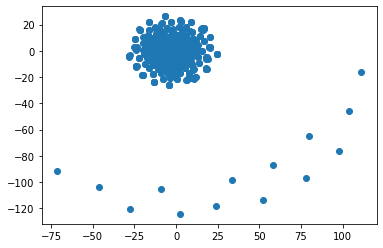

In [16]:
# create a scatter plot of the t-SNE output

plt.scatter(tsne_features[:,0], tsne_features[:, 1])
plt.show

# Cluster Analysis with k-Means

In [17]:
inertia = []
k = list(range(1,11))
k

for i in k:
    km= KMeans(n_clusters=i, random_state=0)
    km.fit(df_dummies)
    inertia.append(km.inertia_)

C:\Users\agunb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


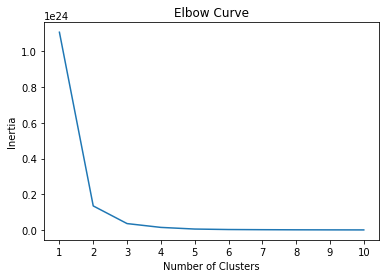

In [18]:
# creating DataFrame to plot Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df


plt.plot(elbow_df["k"], elbow_df["inertia"])
plt.xticks(list(range(1,11)))
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

#  Recommendation


Cryptocurrencies can be clustered into 4. When k is above 4, there is a gradual decrease in inertia

In [19]:
KMeans_df = pd.DataFrame(tsne_features).reset_index(drop=True)
KMeans_df

,0,1
0,-11.015692,-3.579386
1,-14.280592,-4.616671
2,8.025254,0.557825
3,-3.084140,-6.361547
4,8.764493,-4.141918
...,...,...
527,-27.841835,-3.478169
528,-4.196310,-26.381956
529,-1.722267,9.688390
530,-2.861472,-12.708354


In [20]:
# Initialize the K-Means model

model = KMeans(n_clusters=4, random_state=0)

# Fit the model

model.fit(KMeans_df)

# Predict clusters

predictions= model.predict(KMeans_df)


# Add the predicted class columns
KMeans_df["class"]= model.labels_
KMeans_df

,0,1,class
0,-11.015692,-3.579386,0
1,-14.280592,-4.616671,0
2,8.025254,0.557825,2
3,-3.084140,-6.361547,0
4,8.764493,-4.141918,2
...,...,...,...
527,-27.841835,-3.478169,0
528,-4.196310,-26.381956,2
529,-1.722267,9.688390,0
530,-2.861472,-12.708354,2


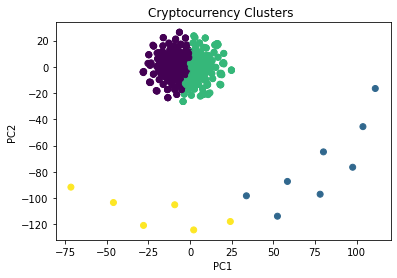

In [21]:
# visualize the clusters

plt.scatter(x=KMeans_df[0], y= KMeans_df[1], c= KMeans_df["class"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cryptocurrency Clusters ")
plt.show()